### Post Analysis of RayTune Results

Run RayTune using the script `Tune.py`. Perform **Post Analysis** here. 


See more details on [Analyzing Tune Experiment Results](https://docs.ray.io/en/latest/tune/examples/tune_analyze_results.html)

In [2]:
from ray import tune, air
from ray.tune import ResultGrid

In [5]:
local_dir = "/shared/adeel/data_sets/ctd2022/run_10k/ray_tune"
exp_name = "TuneResult"

In [6]:
experiment_path = f"{local_dir}/{exp_name}"
print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path)
result_grid = restored_tuner.get_results()

Loading results from /shared/adeel/data_sets/ctd2022/run_10k/ray_tune/TuneResult...


In [7]:
# Check if there have been errors
if result_grid.errors:
    print("One of the trials failed!")
else:
    print("No errors!")

One of the trials failed!


In [8]:
num_results = len(result_grid)
print("Number of results:", num_results)

Number of results: 5


In [9]:
# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f"Trial #{i} had an error:", result.error)
        continue

    print(
        f"Trial #{i} finished successfully with a mean accuracy metric of:",
        result.metrics["mean_accuracy"]
    )

Trial #0 finished successfully with a mean accuracy metric of: 0.9641472697257996
Trial #1 finished successfully with a mean accuracy metric of: 0.9640283584594727
Trial #2 had an error: Failure # 1 (occurred at 2023-01-22_20-21-50)
Traceback (most recent call last):
  File "/shared/adeel/anaconda3/envs/exatrkx-cpu/lib/python3.8/site-packages/ray/tune/execution/ray_trial_executor.py", line 1070, in get_next_executor_event
    future_result = ray.get(ready_future)
  File "/shared/adeel/anaconda3/envs/exatrkx-cpu/lib/python3.8/site-packages/ray/_private/client_mode_hook.py", line 105, in wrapper
    return func(*args, **kwargs)
  File "/shared/adeel/anaconda3/envs/exatrkx-cpu/lib/python3.8/site-packages/ray/_private/worker.py", line 2311, in get
    raise value
ray.exceptions.RayActorError: The actor died unexpectedly before finishing this task.
	class_name: ImplicitFunc
	actor_id: cd7abe55e8b6642c5bee880c01000000
	pid: 540380
	namespace: 11b8443e-e4b3-47a4-a0c8-a6d83c1156b0
	ip: 130.238

In [10]:
results_df = result_grid.get_dataframe()
results_df[["training_iteration", "mean_accuracy"]]

,training_iteration,mean_accuracy
0,10,0.964147
1,10,0.964028
2,8,0.963667
3,10,0.963491


In [11]:
print("Shortest training time:", results_df["time_total_s"].min())
print("Longest training time:", results_df["time_total_s"].max())

Shortest training time: 43880.51859951019
Longest training time: 53796.01085472107


In [12]:
best_result_df = result_grid.get_dataframe(
    filter_metric="mean_accuracy", filter_mode="max"
)
best_result_df[["training_iteration", "mean_accuracy"]]

,training_iteration,mean_accuracy
0,9,0.964147
1,9,0.964028
2,7,0.963667
3,9,0.963491


In [13]:
from ray.air import Result

# Get the result with the maximum test set `mean_accuracy`
best_result: Result = result_grid.get_best_result()

# Get the result with the minimum `mean_accuracy`
worst_performing_result: Result = result_grid.get_best_result(
    metric="mean_accuracy", mode="min"
)

In [14]:
best_result.config

{'common_configs': {'experiment_name': 'TuneStudy',
  'artifact_directory': '/shared/adeel/data_sets/ctd2022/run_10k/ray_tune',
  'gpus': 0,
  'clear_directories': True},
 'model_configs': {'input_dir': '/shared/adeel/data_sets/ctd2022/run_10k/feature_store',
  'output_dir': '/shared/adeel/data_sets/ctd2022/run_10k/tune_processed',
  'project': 'TuneStudy',
  'edge_cut': 0.5,
  'pt_signal_min': 0.0,
  'pt_background_min': 0.0,
  'datatype_names': [['train', 'val', 'test']],
  'datatype_split': [[8000, 1000, 1000]],
  'train_split': [8000, 1000, 1000],
  'sorted_events': True,
  'noise': False,
  'overwrite': True,
  'n_workers': 8,
  'spatial_channels': 3,
  'cell_channels': 0,
  'hidden': 128,
  'n_graph_iters': 8,
  'nb_node_layer': 3,
  'nb_edge_layer': 3,
  'emb_channels': 0,
  'layernorm': False,
  'batchnorm': False,
  'batchsize': 1,
  'aggregation': 'sum_max',
  'hidden_activation': 'ReLU',
  'weight': 2,
  'warmup': 200,
  'lr': 0.001,
  'factor': 0.3,
  'patience': 10,
  'reg

In [15]:
best_result.log_dir

PosixPath('/shared/adeel/data_sets/ctd2022/run_10k/ray_tune/TuneResult/train_dnn_fbf47_00000_0_batch_size=128,l1_size=128,l2_size=512,l3_size=128,l4_size=1024,l5_size=512_2023-01-22_17-36-56')

In [16]:
# Get the last Ray AIR Checkpoint associated with the best-performing trial
best_result.checkpoint

Checkpoint(local_path=/shared/adeel/data_sets/ctd2022/run_10k/ray_tune/TuneResult/train_dnn_fbf47_00000_0_batch_size=128,l1_size=128,l2_size=512,l3_size=128,l4_size=1024,l5_size=512_2023-01-22_17-36-56/checkpoint_epoch=4-step=39999)

In [17]:
# Get the last reported set of metrics
best_result.metrics

{'loss': 0.14585228264331818,
 'mean_accuracy': 0.9641472697257996,
 'time_this_iter_s': 0.270294189453125,
 'should_checkpoint': True,
 'done': True,
 'timesteps_total': None,
 'episodes_total': None,
 'training_iteration': 10,
 'trial_id': 'fbf47_00000',
 'experiment_id': '3de598dc71af4daebe74cd842d7c5909',
 'date': '2023-01-23_08-33-26',
 'timestamp': 1674459206,
 'time_total_s': 53787.009577035904,
 'pid': 540341,
 'hostname': 'phy-hestia',
 'node_ip': '130.238.68.224',
 'config': {'common_configs': {'experiment_name': 'TuneStudy',
   'artifact_directory': '/shared/adeel/data_sets/ctd2022/run_10k/ray_tune',
   'gpus': 0,
   'clear_directories': True},
  'model_configs': {'input_dir': '/shared/adeel/data_sets/ctd2022/run_10k/feature_store',
   'output_dir': '/shared/adeel/data_sets/ctd2022/run_10k/tune_processed',
   'project': 'TuneStudy',
   'edge_cut': 0.5,
   'pt_signal_min': 0.0,
   'pt_background_min': 0.0,
   'datatype_names': [['train', 'val', 'test']],
   'datatype_split': 

In [18]:
result_df = best_result.metrics_dataframe
result_df[["training_iteration", "mean_accuracy", "time_total_s"]]

,training_iteration,mean_accuracy,time_total_s
0,1,0.960260,12502.960163
1,2,0.960260,12503.302956
2,3,0.962354,22978.504213
3,4,0.962354,22978.831117
4,5,0.963187,33485.523515
5,6,0.963187,33485.897769
6,7,0.963489,43999.010890
7,8,0.963489,43999.302626
8,9,0.964147,53786.739283
9,10,0.964147,53787.009577


### _Plotting Metrics_

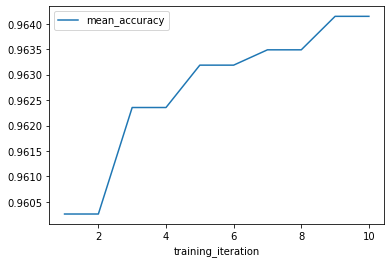

In [20]:
best_result.metrics_dataframe.plot("training_iteration", "mean_accuracy");